In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from zipfile import ZipFile


Display the first few rows of the dataset
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578   

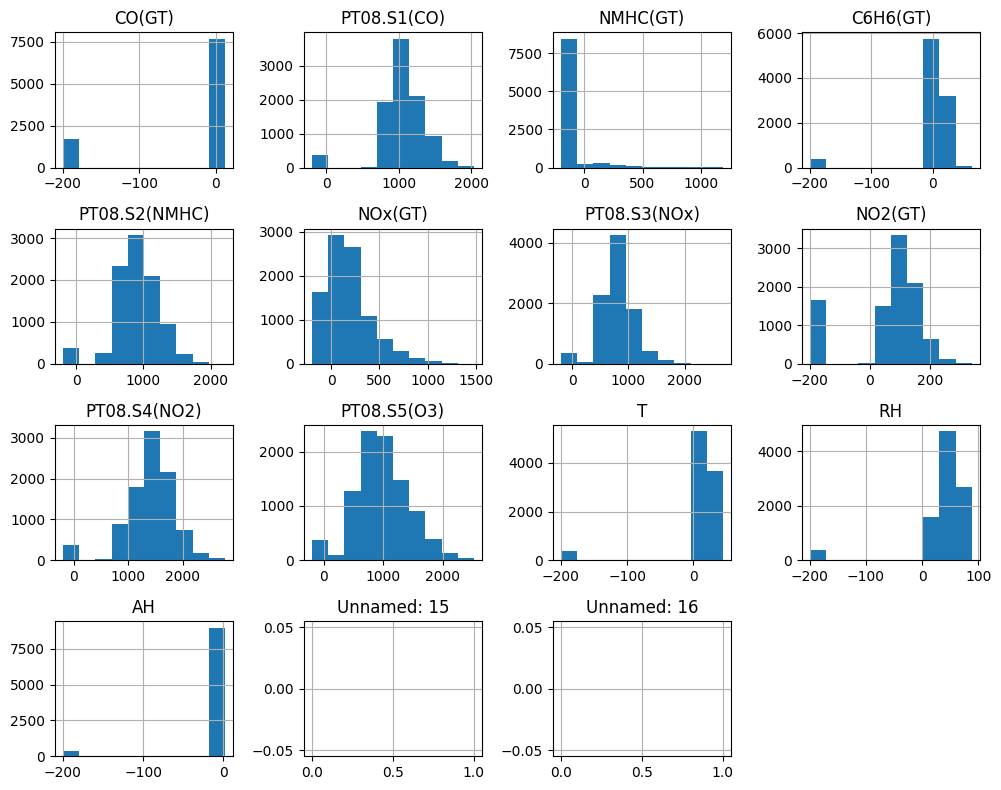

Data visualization - Correlation heatmap


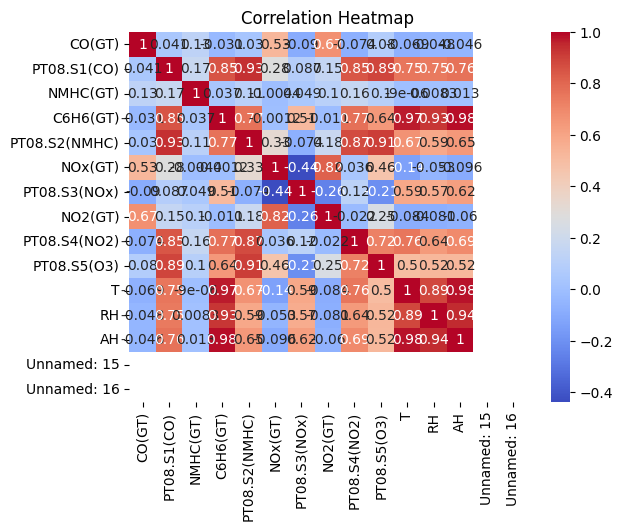

Assess skewness of the data
CO(GT)          -1.666180
PT08.S1(CO)     -1.721503
NMHC(GT)         4.075784
C6H6(GT)        -4.508763
PT08.S2(NMHC)   -0.793435
NOx(GT)          0.825232
PT08.S3(NOx)    -0.384760
NO2(GT)         -1.225630
PT08.S4(NO2)    -1.244110
PT08.S5(O3)     -0.034662
T               -4.445467
RH              -3.932407
AH              -4.754570
Unnamed: 15           NaN
Unnamed: 16           NaN
dtype: float64


C:\Users\Aravind R K\AppData\Local\Temp\ipykernel_14128\4041228737.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew()
c:\Users\Aravind R K\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/03/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Aravind R K\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/03/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Aravind R K\AppData\Local\Programs\Python\Python

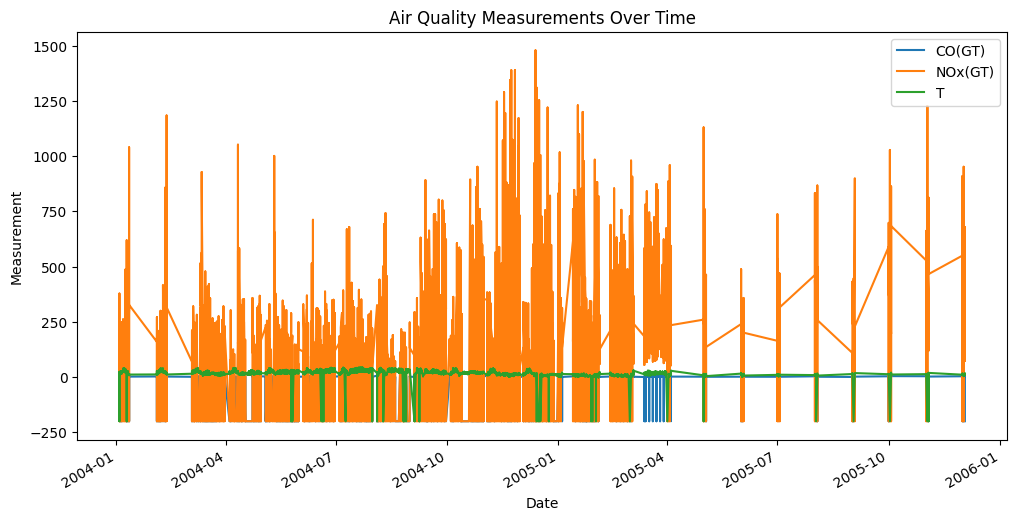

In [2]:
# Download the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
filename = "AirQualityUCI.zip"
urllib.request.urlretrieve(url, filename)

# Extract the CSV file from the ZIP file
with ZipFile(filename, "r") as zip_file:
    csv_file = zip_file.open("AirQualityUCI.csv")

    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file, sep=";", decimal=",")

# Display the first few rows of the dataset
print("Display the first few rows of the dataset")
print(df.head())

# Summary statistics of the dataset
print("Summary statistics of the dataset")
print(df.describe())

# Check for missing values
print("Check for missing values")
print(df.isnull().sum())

# Data visualization - Histogram of each feature
print("Data visualization - Histogram of each feature")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Data visualization - Correlation heatmap
print("Data visualization - Correlation heatmap")
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Assess skewness of the data
print("Assess skewness of the data")
skewness = df.skew()
print(skewness)

# Identify potential biases
# You can perform further analysis based on your specific research objectives and the features in the dataset.
# For example, you can compare the distribution of air quality measurements across different time periods, locations, or weather conditions.

# Time series analysis - Visualize the quality of change
df["Date"] = pd.to_datetime(df["Date"])
df.plot(x="Date", y=["CO(GT)", "NOx(GT)", "T"], figsize=(12, 6))
plt.title("Air Quality Measurements Over Time")
plt.ylabel("Measurement")
plt.show()


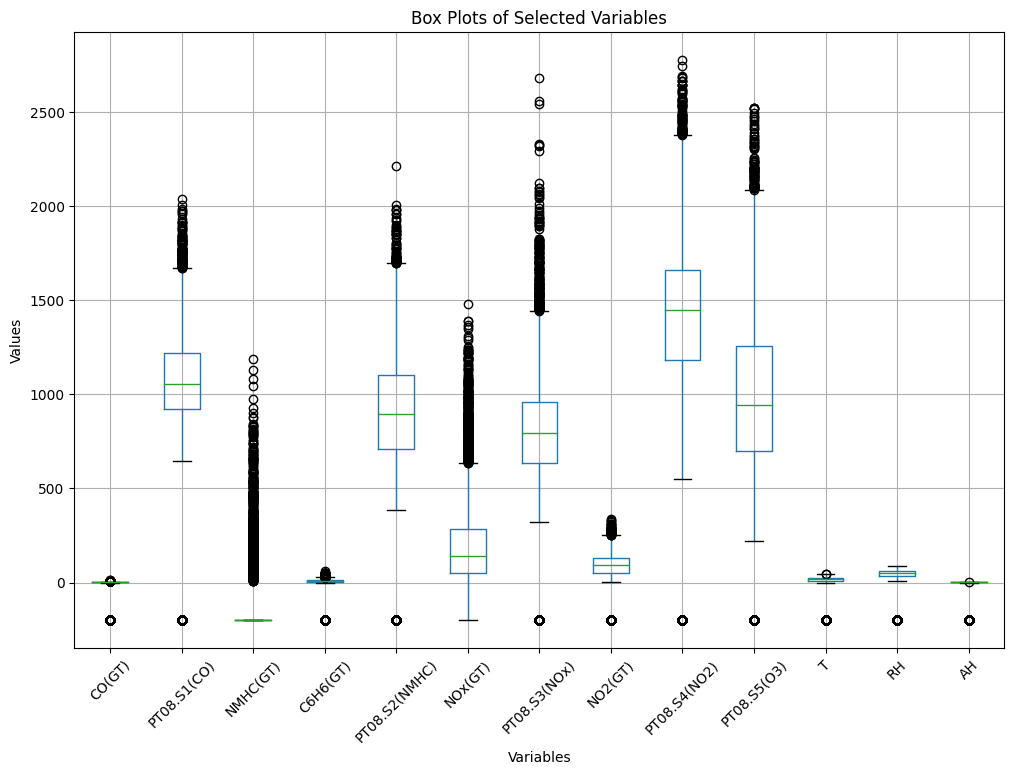

No outliers found in column: CO(GT)
Number of outliers in column CO(GT): 0


Outliers found in column: PT08.S1(CO)
121     2040.0
524     -200.0
525     -200.0
526     -200.0
701     -200.0
         ...  
8111    -200.0
8112    -200.0
8113    -200.0
8114    -200.0
8777    -200.0
Name: PT08.S1(CO), Length: 367, dtype: float64
Number of outliers in column PT08.S1(CO): 367


Outliers found in column: NMHC(GT)
24      307.0
25      461.0
26      401.0
50      488.0
51      333.0
        ...  
1224    460.0
1225    642.0
1226    501.0
1229    275.0
1230    275.0
Name: NMHC(GT), Length: 270, dtype: float64
Number of outliers in column NMHC(GT): 270


Outliers found in column: C6H6(GT)
524    -200.0
525    -200.0
526    -200.0
701    -200.0
702    -200.0
        ...  
8111   -200.0
8112   -200.0
8113   -200.0
8114   -200.0
8777   -200.0
Name: C6H6(GT), Length: 366, dtype: float64
Number of outliers in column C6H6(GT): 366


Outliers found in column: PT08.S2(NMHC)
524    -200.0
525    -200.0
5

In [3]:
#IDENTIFY DATA OUTLIERS

# Select the columns that may contain outliers
columns_of_interest = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)",
                       "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]

# Create box plots for each column to visualize outliers
plt.figure(figsize=(12, 8))
df[columns_of_interest].boxplot()
plt.xticks(rotation=45)
plt.title("Box Plots of Selected Variables")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()

# Define the threshold for identifying outliers (you can adjust this based on your specific requirements)
outlier_threshold = 3  # Adjust this value as needed

# Iterate over each column and identify the outliers
for column in columns_of_interest:
    # Calculate the z-scores for each data point
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    
    # Identify the outliers based on the z-scores exceeding the threshold
    outliers = df[abs(z_scores) > outlier_threshold][column]
    
    if outliers.empty:
        print(f"No outliers found in column: {column}")
    else:
        print(f"Outliers found in column: {column}")
        print(outliers)
        
    # Count the number of outliers in the column
    num_outliers = len(outliers)
    print(f"Number of outliers in column {column}: {num_outliers}")
    print("\n")

In [4]:
# Select the columns of interest (replace the column names as per your dataset)
columns_of_interest = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)",
                       "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]

# Create a new DataFrame to store the relevancy scores
relevancy_scores = pd.DataFrame(columns=["Column", "RelevancyScore"])

# Iterate over each column and calculate the relevancy score
for column in columns_of_interest:
    # Calculate the z-scores for each data point
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    # Identify the outliers based on the z-scores exceeding the threshold
    outliers = df[abs(z_scores) > outlier_threshold][column]

    # Calculate the relevancy score for the column
    relevancy_score = len(df[column]) - df[column].isnull().sum() - len(outliers)

    # Append the column name and relevancy score to the relevancy_scores DataFrame
    relevancy_scores = relevancy_scores.append({"Column": column, "RelevancyScore": relevancy_score}, ignore_index=True)

# Print the relevancy scores for each column
print("Relevancy Scores:")
print(relevancy_scores)

Relevancy Scores:
           Column RelevancyScore
0          CO(GT)           9357
1     PT08.S1(CO)           8990
2        NMHC(GT)           9087
3        C6H6(GT)           8991
4   PT08.S2(NMHC)           8982
5         NOx(GT)           9247
6    PT08.S3(NOx)           8935
7         NO2(GT)           9357
8    PT08.S4(NO2)           8991
9     PT08.S5(O3)           9338
10              T           8991
11             RH           8991
12             AH           8991


C:\Users\Aravind R K\AppData\Local\Temp\ipykernel_14128\165550955.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relevancy_scores = relevancy_scores.append({"Column": column, "RelevancyScore": relevancy_score}, ignore_index=True)
C:\Users\Aravind R K\AppData\Local\Temp\ipykernel_14128\165550955.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relevancy_scores = relevancy_scores.append({"Column": column, "RelevancyScore": relevancy_score}, ignore_index=True)
C:\Users\Aravind R K\AppData\Local\Temp\ipykernel_14128\165550955.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relevancy_scores = relevancy_scores.append({"Column": column, "RelevancyScore": relevancy_score}, ignore_index=True)
C:\Users\Aravind R K\AppD

No outliers found in column: CO(GT)
Number of outliers in column CO(GT): 0


Outliers found in column: PT08.S1(CO)
Name: PT08.S1(CO), Length: 367, dtype: float64
Number of outliers in column PT08.S1(CO): 367


Outliers found in column: NMHC(GT)
Name: NMHC(GT), Length: 270, dtype: float64
Number of outliers in column NMHC(GT): 270


Outliers found in column: C6H6(GT)
Name: C6H6(GT), Length: 366, dtype: float64
Number of outliers in column C6H6(GT): 366


Outliers found in column: PT08.S2(NMHC)
Name: PT08.S2(NMHC), Length: 375, dtype: float64
Number of outliers in column PT08.S2(NMHC): 375


Outliers found in column: NOx(GT)
Name: NOx(GT), Length: 110, dtype: float64
Number of outliers in column NOx(GT): 110


Outliers found in column: PT08.S3(NOx)
Name: PT08.S3(NOx), Length: 422, dtype: float64
Number of outliers in column PT08.S3(NOx): 422


No outliers found in column: NO2(GT)
Number of outliers in column NO2(GT): 0


Outliers found in column: PT08.S4(NO2)
Name: PT08.S4(NO2), Length: 366, dtype: float64
Number of outliers in column PT08.S4(NO2): 366


Outliers found in column: PT08.S5(O3)
Name: PT08.S5(O3), dtype: float64
Number of outliers in column PT08.S5(O3): 19


Outliers found in column: T
Name: T, Length: 366, dtype: float64
Number of outliers in column T: 366


Outliers found in column: RH
Name: RH, Length: 366, dtype: float64
Number of outliers in column RH: 366


Outliers found in column: AH
Name: AH, Length: 366, dtype: float64
Number of outliers in column AH: 366

In [5]:
# Create a new DataFrame to store the consistency scores
consistency_scores = pd.DataFrame(columns=["Column", "ConsistencyScore"])

# Iterate over each column and calculate the consistency score
for column in columns_of_interest:
    # Calculate the coefficient of variation (CV)
    cv = df[column].std() / df[column].mean()
    
    # Calculate the consistency score for the column (higher consistency -> lower CV)
    consistency_score = 1 - cv
    
    # Append the column name and consistency score to the consistency_scores DataFrame
    consistency_scores = consistency_scores.append({"Column": column, "ConsistencyScore": consistency_score}, ignore_index=True)

# Print the consistency scores for each column
print("Consistency Scores:")
print(consistency_scores)

Consistency Scores:
           Column  ConsistencyScore
0          CO(GT)          3.270178
1     PT08.S1(CO)          0.685571
2        NMHC(GT)          1.878679
3        C6H6(GT)        -21.179650
4   PT08.S2(NMHC)          0.617332
5         NOx(GT)         -0.526738
6    PT08.S3(NOx)          0.594972
7         NO2(GT)         -1.183025
8    PT08.S4(NO2)          0.664235
9     PT08.S5(O3)          0.531380
10              T         -3.418314
11             RH         -0.297091
12             AH          6.700341


C:\Users\Aravind R K\AppData\Local\Temp\ipykernel_14128\2004748778.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consistency_scores = consistency_scores.append({"Column": column, "ConsistencyScore": consistency_score}, ignore_index=True)
C:\Users\Aravind R K\AppData\Local\Temp\ipykernel_14128\2004748778.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consistency_scores = consistency_scores.append({"Column": column, "ConsistencyScore": consistency_score}, ignore_index=True)
C:\Users\Aravind R K\AppData\Local\Temp\ipykernel_14128\2004748778.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consistency_scores = consistency_scores.append({"Column": column, "ConsistencyScore": consistency_score}, ignore_index=True

For columns like "CO(GT)", "NMHC(GT)", "PT08.S2(NMHC)", "PT08.S3(NOx)", and "PT08.S4(NO2)", the scores are relatively high (above 0.5), 
suggesting a reasonable level of consistency in the data.

On the other hand, columns like "C6H6(GT)", "NOx(GT)", "NO2(GT)", "T", and "RH" have negative or low scores, 
indicating higher variability or potential inconsistencies within those columns.

The column "AH" stands out with a relatively high consistency score of 6.700341, 
which could be an outlier

In [7]:
# Select the columns of interest
columns_of_interest = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)",
                       "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]

# Calculate the KPIs for data bias and skewed data
kpi_results = {}

for column in columns_of_interest:
    kpi_results[column] = {
        "Mean": df[column].mean(),
        "Median": df[column].median(),
        "Mode": df[column].mode()[0],
        "Skewness": df[column].skew(),
        "Range": df[column].max() - df[column].min(),
        "IQR": df[column].quantile(0.75) - df[column].quantile(0.25),
        "Variance": df[column].var(),
        "Standard Deviation": df[column].std()
    }

# Create a DataFrame from the KPI results
kpi_df = pd.DataFrame(kpi_results)

# Print the KPI results
print("KPI Results:")
print(kpi_df)

KPI Results:
                         CO(GT)    PT08.S1(CO)      NMHC(GT)     C6H6(GT)  \
Mean                 -34.207524    1048.990061   -159.090093     1.865683   
Median                 1.500000    1053.000000   -200.000000     7.900000   
Mode                -200.000000    -200.000000   -200.000000  -200.000000   
Skewness              -1.666180      -1.721503      4.075784    -4.508763   
Range                211.900000    2240.000000   1389.000000   263.700000   
IQR                    2.000000     300.000000      0.000000     9.600000   
Variance            6030.636106  108789.616511  19540.990493  1712.321485   
Standard Deviation    77.657170     329.832710    139.789093    41.380206   

                    PT08.S2(NMHC)       NOx(GT)   PT08.S3(NOx)       NO2(GT)  \
Mean                   894.595276    168.616971     794.990168     58.148873   
Median                 895.000000    141.000000     794.000000     96.000000   
Mode                  -200.000000   -200.000000    -2

In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already loaded and preprocessed your time series data into the "df" DataFrame

# List of columns of interest for anomaly detection
columns_of_interest = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)",
                       "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]

# Prompt the user to choose a column
print("Available columns:")
for i, col in enumerate(columns_of_interest):
    print(f"{i+1}. {col}")
choice = input("Choose a column number to detect anomalies: ")

try:
    # Convert the choice to integer and get the selected column name
    column_index = int(choice) - 1
    selected_column = columns_of_interest[column_index]
    
    # Create the ARIMA model
    model = ARIMA(df[selected_column], order=(1, 1, 1))
    
    # Fit the model
    model_fit = model.fit()
    
    # Get the predicted values and residuals
    predictions = model_fit.predict()
    residuals = df[selected_column] - predictions
    
    # Calculate the mean and standard deviation of the residuals
    mean = np.mean(residuals)
    std = np.std(residuals)
    
    # Set a threshold for anomaly detection (e.g., 3 standard deviations from the mean)
    threshold = 3 * std
    
    # Detect anomalies by comparing the absolute residuals to the threshold
    anomalies = np.abs(residuals) > threshold
    
    # Print the indices of the detected anomalies
    print("Detected anomalies:")
    print(df.index[anomalies])
    
except (ValueError, IndexError):
    print("Invalid choice. Please choose a valid column number.")


Available columns:
1. CO(GT)
2. PT08.S1(CO)
3. NMHC(GT)
4. C6H6(GT)
5. PT08.S2(NMHC)
6. NOx(GT)
7. PT08.S3(NOx)
8. NO2(GT)
9. PT08.S4(NO2)
10. PT08.S5(O3)
11. T
12. RH
13. AH
Detected anomalies:
Int64Index([  10,   34,   39,   58,   82,  106,  130,  154,  178,  202,
            ...
            8817, 8823, 8842, 8914, 8986, 9058, 9130, 9202, 9274, 9346],
           dtype='int64', length=231)


Available columns:
1. CO(GT)
2. PT08.S1(CO)
3. NMHC(GT)
4. C6H6(GT)
5. PT08.S2(NMHC)
6. NOx(GT)
7. PT08.S3(NOx)
8. NO2(GT)
9. PT08.S4(NO2)
10. PT08.S5(O3)
11. T
12. RH
13. AH


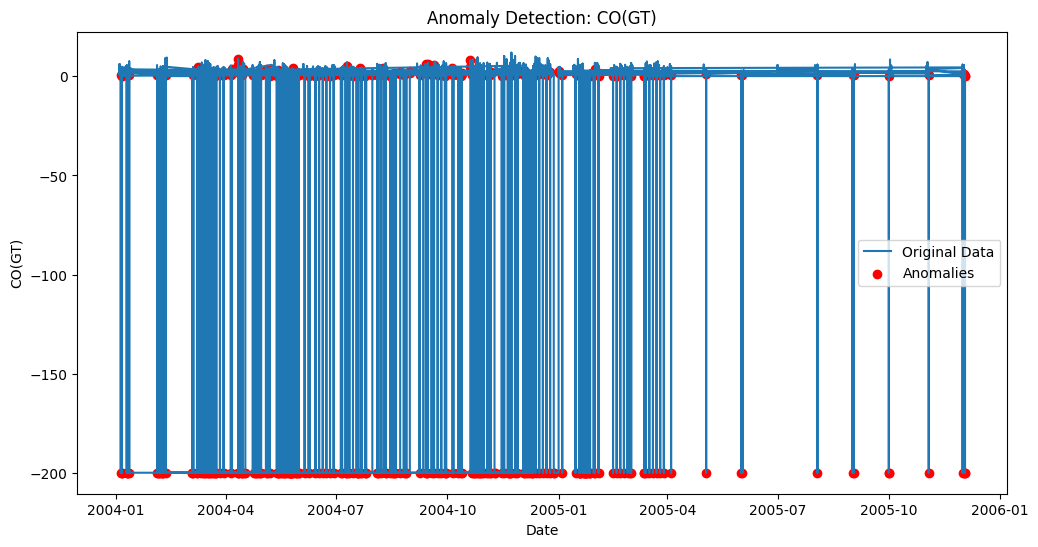

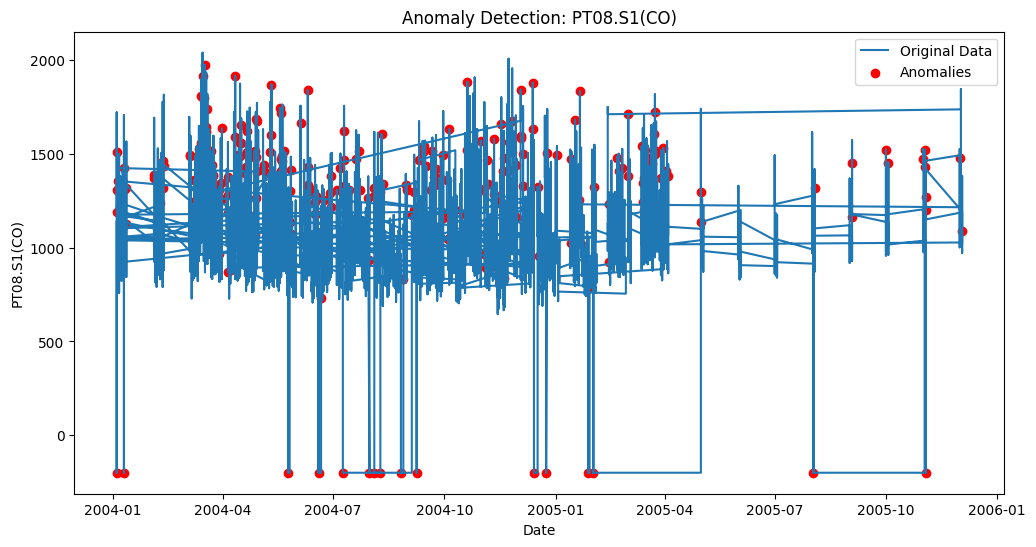

Detected anomalies:
      CO(GT)  PT08.S1(CO)
0          0            1
10         1            0
11         1            0
27         0            1
28         0            1
...      ...          ...
9274       1            0
9275       1            0
9346       1            0
9347       1            0
9349       0            1

[732 rows x 2 columns]
Detected skewed data points:
Empty DataFrame
Columns: [CO(GT), PT08.S1(CO), Skewed Data]
Index: []


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already loaded and preprocessed your time series data into the "df" DataFrame

# List of columns of interest for anomaly detection
columns_of_interest = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)",
                       "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]

# Prompt the user to choose columns
print("Available columns:")
for i, col in enumerate(columns_of_interest):
    print(f"{i+1}. {col}")
choice = input("Choose column numbers (comma-separated) to detect anomalies: ")

try:
    # Convert the choices to a list of column indices
    column_indices = [int(x.strip()) - 1 for x in choice.split(",")]

    # Create an empty DataFrame to store the anomalies
    anomalies_df = pd.DataFrame(index=df.index)

    for index in column_indices:
        if index < 0 or index >= len(columns_of_interest):
            continue

        # Get the selected column name
        selected_column = columns_of_interest[index]

        # Create the ARIMA model
        model = ARIMA(df[selected_column], order=(1, 1, 1))

        # Fit the model
        model_fit = model.fit()

        # Get the predicted values and residuals
        predictions = model_fit.predict()
        residuals = df[selected_column] - predictions

        # Calculate the mean and standard deviation of the residuals
        mean = np.mean(residuals)
        std = np.std(residuals)

        # Set a threshold for anomaly detection (e.g., 3 standard deviations from the mean)
        threshold = 2 * std

        # Detect anomalies by comparing the absolute residuals to the threshold
        anomalies = np.abs(residuals) > threshold

        # Add the anomalies to the anomalies DataFrame
        anomalies_df[selected_column] = anomalies.astype(int)

        # Plot the time series data with detected anomalies
        plt.figure(figsize=(12, 6))
        plt.plot(df["Date"], df[selected_column], label="Original Data")
        plt.scatter(df["Date"][anomalies], df[selected_column][anomalies], color='red', label="Anomalies")
        plt.xlabel("Date")
        plt.ylabel(selected_column)
        plt.title(f"Anomaly Detection: {selected_column}")
        plt.legend()
        plt.show()

    # Print the detected anomalies
    print("Detected anomalies:")
    print(anomalies_df.loc[anomalies_df.any(axis=1)])

except (ValueError, IndexError):
    print("Invalid choices. Please choose valid column numbers.")


# Calculate the skewness of the residuals
residual_skewness = residuals.skew()

# Set a threshold for skewness
skewness_threshold = 1.0  # Adjust this threshold based on your data and requirements

# Detect skewed data points by comparing the absolute skewness to the threshold
skewed_data_points = np.abs(residual_skewness) > skewness_threshold

# Add the detected skewed data points to the anomalies DataFrame
anomalies_df["Skewed Data"] = skewed_data_points.astype(int)

# Print the detected skewed data points
print("Detected skewed data points:")
print(anomalies_df.loc[anomalies_df["Skewed Data"] == 1])



Detected skewed data points:
Empty DataFrame
Columns: [CO(GT), PT08.S1(CO), Skewed Data]
Index: []
